# 药品销售分析

In [50]:
import pandas as pd
from matplotlib import pyplot as plt

# 绘图中设置中文字体
from matplotlib import font_manager
my_font = font_manager.FontProperties(fname="C:/Windows/Fonts/simsun.ttc")

In [5]:
file_path = ".\某医院2018年药品销售数据.xlsx"
df = pd.read_excel(file_path)

## 1. 查看数据

In [6]:
# 查看前五条数据
df.head()

,购药时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
0,2018-01-01 星期五,1.616528e+06,236701.0,强力VC银翘片,6.0,82.8,69.00
1,2018-01-02 星期六,1.616528e+06,236701.0,清热解毒口服液,1.0,28.0,24.64
2,2018-01-06 星期三,1.260283e+07,236701.0,感康,2.0,16.8,15.00
3,2018-01-11 星期一,1.007034e+10,236701.0,三九感冒灵,1.0,28.0,28.00
4,2018-01-15 星期五,1.015543e+08,236701.0,三九感冒灵,8.0,224.0,208.00


In [17]:
# 查看数据量
df.shape

(6509, 9)

In [8]:
# 表结构
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6578 entries, 0 to 6577
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   购药时间    6576 non-null   object 
 1   社保卡号    6576 non-null   float64
 2   商品编码    6577 non-null   float64
 3   商品名称    6577 non-null   object 
 4   销售数量    6577 non-null   float64
 5   应收金额    6577 non-null   float64
 6   实收金额    6577 non-null   float64
dtypes: float64(5), object(2)
memory usage: 359.9+ KB


In [9]:
# 查看缺失值数量
pd.DataFrame(df.isnull().sum(), columns=["缺失值数量"])

,缺失值数量
购药时间,2
社保卡号,2
商品编码,1
商品名称,1
销售数量,1
应收金额,1
实收金额,1


## 2. 数据清洗

In [10]:
# 缺失值很少，直接删除
df.dropna(how="any", inplace=True)
print("删除后的数据量：",df.shape)
pd.DataFrame(df.isnull().sum(), columns=["缺失值数量"])

删除后的数据量： (6575, 7)


,缺失值数量
购药时间,0
社保卡号,0
商品编码,0
商品名称,0
销售数量,0
应收金额,0
实收金额,0


In [11]:
# 查找异常值
df[df["销售数量"] <= 0].head() # 销售数量为0或者为负数

,购药时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
61,2018-05-02 星期一,1.161653e+07,236702.0,强力VC银翘片,-1.0,-13.8,-13.8
100,2018-06-19 星期日,1.148763e+07,236704.0,氨加黄敏胶囊,-1.0,-12.4,-11.0
201,2018-02-24 星期三,1.001256e+10,236706.0,阿司匹林,-2.0,-93.6,-84.0
271,2018-01-31 星期日,1.616528e+06,236709.0,心痛定,-1.0,-44.8,-39.8
439,2018-01-17 星期日,1.263213e+07,2367011.0,开博通,0.0,0.0,0.0


In [12]:
# 删除异常值
df.drop(df[df["销售数量"] <= 0].index, inplace=True)
# 查看数据量
df.shape

(6532, 7)

In [13]:
# 把购药时间分成日期和星期两个字段
df[["日期","星期"]] = df["购药时间"].str.split(" ",expand=True)

# 删除原来的"购药时间"和"社保卡号"
df.drop("购药时间", axis=1)

,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额,日期,星期
0,1.616528e+06,236701.0,强力VC银翘片,6.0,82.8,69.00,2018-01-01,星期五
1,1.616528e+06,236701.0,清热解毒口服液,1.0,28.0,24.64,2018-01-02,星期六
2,1.260283e+07,236701.0,感康,2.0,16.8,15.00,2018-01-06,星期三
3,1.007034e+10,236701.0,三九感冒灵,1.0,28.0,28.00,2018-01-11,星期一
4,1.015543e+08,236701.0,三九感冒灵,8.0,224.0,208.00,2018-01-15,星期五
...,...,...,...,...,...,...,...,...
6572,1.006048e+10,2367011.0,高特灵,1.0,5.6,5.00,2018-04-27,星期三
6573,1.078861e+08,2367011.0,高特灵,10.0,56.0,54.80,2018-04-27,星期三
6575,1.008787e+10,2367011.0,高特灵,2.0,11.2,9.86,2018-04-27,星期三
6576,1.340663e+07,2367011.0,高特灵,1.0,5.6,5.00,2018-04-27,星期三


In [14]:
# 转换日期格式，格式有问题的转换为naT格式
df["日期"]= pd.to_datetime(df["日期"],format='%Y-%m-%d',errors='coerce')
# 删除转换后naT空值
df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6509 entries, 0 to 6577
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   购药时间    6509 non-null   object        
 1   社保卡号    6509 non-null   float64       
 2   商品编码    6509 non-null   float64       
 3   商品名称    6509 non-null   object        
 4   销售数量    6509 non-null   float64       
 5   应收金额    6509 non-null   float64       
 6   实收金额    6509 non-null   float64       
 7   日期      6509 non-null   datetime64[ns]
 8   星期      6509 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 508.5+ KB


In [18]:
# 描述性分析
df.describe()

,社保卡号,商品编码,销售数量,应收金额,实收金额
count,6.509000e+03,6.509000e+03,6509.000000,6509.000000,6509.000000
mean,6.088969e+09,1.015717e+06,2.405285,50.908726,46.709935
std,4.889663e+09,5.123392e+05,2.364095,87.634645,80.983274
min,1.616528e+06,2.367010e+05,1.000000,1.200000,0.030000
25%,1.014234e+08,8.614560e+05,1.000000,14.000000,12.600000
50%,1.001650e+10,8.615070e+05,2.000000,28.000000,27.000000
75%,1.004859e+10,8.687840e+05,2.000000,59.600000,53.000000
max,1.283612e+10,2.367012e+06,50.000000,2950.000000,2650.000000


### 3. 数据分析

#### 3.1 客单价

In [32]:
# 客单价 = 总消费金额 / 总消费次数
# 计算总消费次数（每日相同社保卡号算一次）
con_num = df.drop_duplicates(subset=['日期', '社保卡号'],keep='first',inplace=False)["社保卡号"].count()

# 总消费金额
sum_mon = df["实收金额"].sum()

print("客单价 =", round(sum_mon/con_num, 2), "元")

客单价 = 56.88 元


#### 3.2销售趋势

month
1     845
2     602
3     823
4    1044
5     771
6     750
7     510
Name: 社保卡号, dtype: int64 month
1    49461.19
2    38790.38
3    41597.51
4    48812.70
5    46925.27
6    48327.70
7    30120.22
Name: 实收金额, dtype: float64


c:\users\taota\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


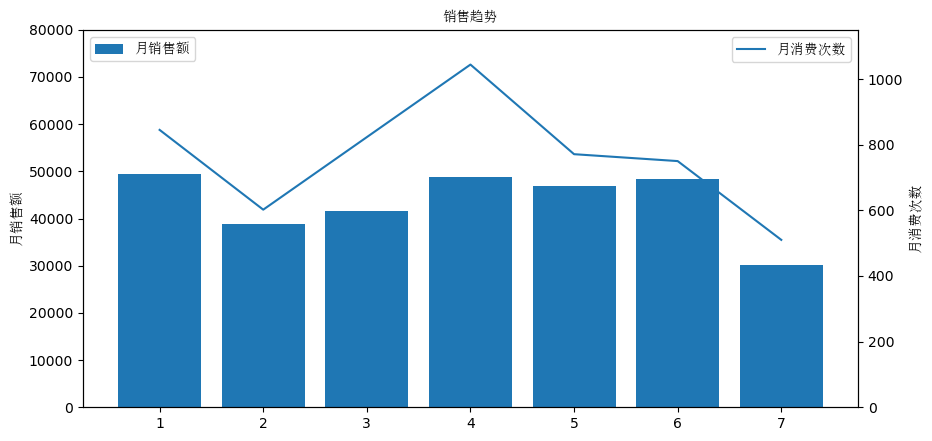

In [112]:
# 添加一列月份
df['month'] = pd.DatetimeIndex(df['日期']).month

# 月消费次数
mon_num = df.drop_duplicates(subset=['日期', '社保卡号']).groupby("month")["社保卡号"].count()

# 月消费金额
mon_mon = df.groupby("month")["实收金额"].sum()
print(mon_num,mon_mon)

# 画图

# 只有1-7月的数据
_x = list(range(1,8))

mon_y = list(mon_mon.values)
num_y = list(mon_num.values)

fig = plt.figure(figsize=(10,5), dpi=100)
plt.title("销售趋势", fontproperties=my_font)

ax1 = fig.add_subplot(111)  
ax1.bar(_x,mon_y, label="月销售额")
ax1.set_ylim(0,80000)
ax1.set_ylabel("月销售额", fontproperties=my_font)
ax1.legend(loc="upper left", prop=my_font)

ax2 = ax1.twinx()
ax2.plot(_x, num_y, label="月消费次数")
ax2.set_ylim(0,1150)
ax2.set_ylabel("月消费次数", fontproperties=my_font)
ax2.legend(loc="upper right", prop=my_font)

plt.show()

#### 3.3药品销量前10

商品名称
苯磺酸氨氯地平片(安内真)        1781.0
开博通                  1440.0
酒石酸美托洛尔片(倍他乐克)       1140.0
硝苯地平片(心痛定)            825.0
苯磺酸氨氯地平片(络活喜)         796.0
复方利血平片(复方降压片)         515.0
G琥珀酸美托洛尔缓释片(倍他乐克)     509.0
缬沙坦胶囊(代文)             445.0
非洛地平缓释片(波依定)          375.0
高特灵                   371.0
Name: 销售数量, dtype: float64


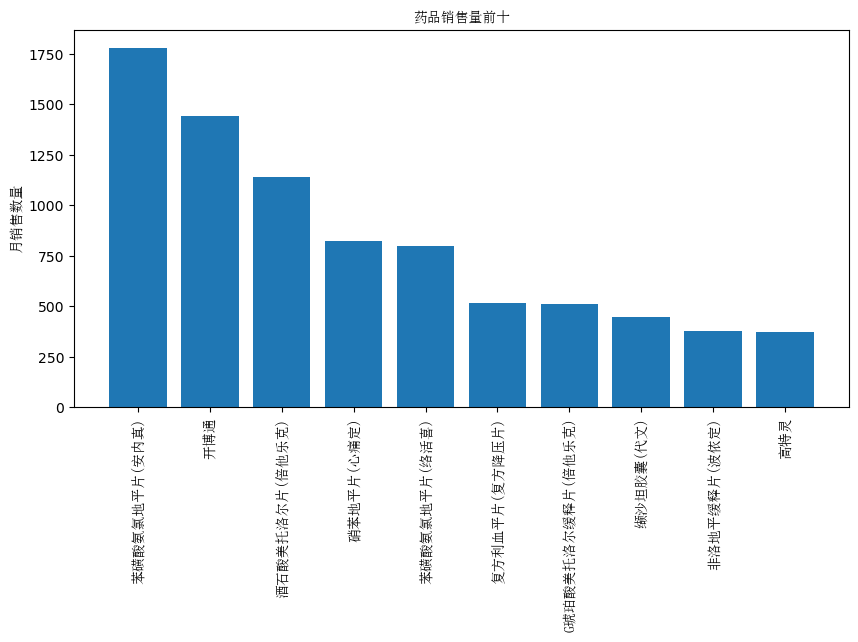

In [117]:
top_10 = df.groupby("商品名称")["销售数量"].sum().sort_values(ascending=False).head(10)
print(top_10)

# 画图
plt.figure(figsize=(10,5), dpi=100)
plt.title("药品销售量前十", fontproperties=my_font)

_x = list(range(10))
_y = list(top_10.values)

plt.bar(_x,_y)

plt.xticks(_x, list(top_10.index), fontproperties=my_font, rotation=90)
plt.ylabel("月销售数量", fontproperties=my_font)

plt.show()

#### 3.4一周内销量变化趋势

星期
星期一    38931.79
星期三    39073.64
星期二    44534.63
星期五    49817.87
星期六    47834.33
星期四    40310.08
星期日    43532.63
Name: 实收金额, dtype: float64


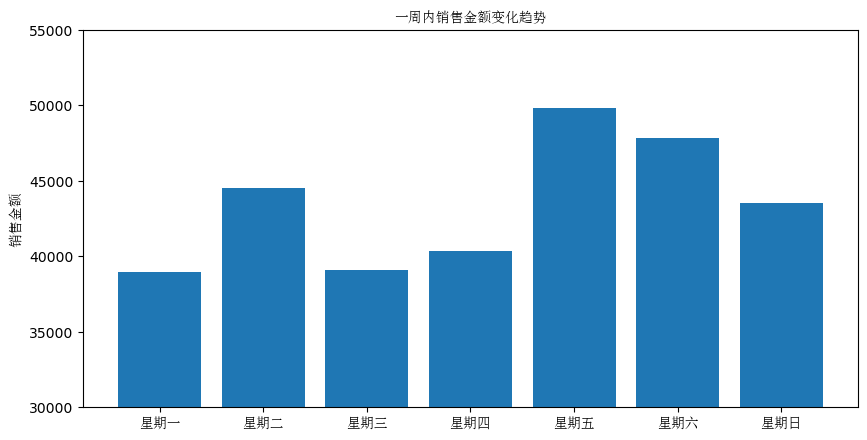

In [138]:
week_money =  df.groupby("星期")["实收金额"].sum()
print(week_money)

# 画图
plt.figure(figsize=(10,5), dpi=100)
plt.title("一周内销售金额变化趋势", fontproperties=my_font)


_x = list(range(7))
week = ["星期一","星期二","星期三","星期四","星期五","星期六","星期日",]
_y = []
for i in week:
    _y.append(week_money.loc[i])

plt.bar(_x,_y)
plt.ylim(30000,55000)

plt.xticks(_x, week, fontproperties=my_font)
plt.ylabel("销售金额", fontproperties=my_font)

plt.show()